In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Load SQL Extension
%load_ext sql

In [3]:
#Connect to SQL Dataframe
%sql ibm_db_sa://rkx74274:gbvkl3c9g0d+6cjz@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: rkx74274@BLUDB'

#### Calculate share of the "severity" for each type of vehicle

In [4]:
#retrive average severity and share of incidents by vehicle type
Vehicle_sev = %sql select VEHICLE_1, SUM(SEVERITY)/COUNT(SEVERITY) from COLLISIONS group by VEHICLE_1 order by SUM(SEVERITY)/COUNT(SEVERITY) desc
Vehicle_rel = %sql select COUNT(Vehicle_1)/1000 from COLLISIONS group by vehicle_1 order by SUM(SEVERITY)/COUNT(SEVERITY) desc

#create dataframe
df_vehicle = pd.DataFrame(Vehicle_sev, columns=['Vehicle','severity'])
df_vehicle_rel = pd.DataFrame(Vehicle_rel, columns=['share'])
df_vehicle['share'] = df_vehicle_rel

#parse to float
df_vehicle = df_vehicle.astype({"severity": float, "share": float})

#option to filter only realtive share over 0.5%
df_vehicle = df_vehicle[df_vehicle.share > 0.5]

print(df_vehicle)

 * ibm_db_sa://rkx74274:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://rkx74274:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
          Vehicle  severity   share
3            Bike  0.880633   0.821
5      Motorcycle  0.640884   0.724
9            Taxi  0.341951   3.752
11          Sedan  0.303946  36.750
12            SUV  0.302890  48.506
13            Bus  0.292737   1.363
19            Van  0.232727   0.550
22  Pick-up Truck  0.209886   2.549
25        Tractor  0.138705   0.757
26      Box Truck  0.137277   1.741


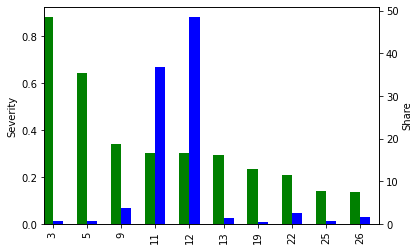

In [5]:
#create plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.3

#link datasets
df_vehicle.severity.plot(kind='bar', color='green', ax=ax, width=width, position=1)
df_vehicle.share.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Severity')
ax2.set_ylabel('Share')

plt.show()

In [6]:
#retrive average severity and share of incidents by cause
Cause_sev = %sql select FACTOR_1, SUM(SEVERITY)/COUNT(SEVERITY) from COLLISIONS group by FACTOR_1 order by SUM(SEVERITY)/COUNT(SEVERITY) desc
Cause_rel = %sql select COUNT(FACTOR_1)/1000 from COLLISIONS group by FACTOR_1 order by SUM(SEVERITY)/COUNT(SEVERITY) desc

#create dataframe
df_cause = pd.DataFrame(Cause_sev, columns=['Vehicle','severity'])
df_cause_rel = pd.DataFrame(Cause_rel, columns=['share'])
df_cause['share'] = df_cause_rel
df_cause = df_cause.astype({"severity": float, "share": float})

#option to filter only realtive share over 1%
df_cause = df_cause[df_cause.share > 1]

print(df_cause)

 * ibm_db_sa://rkx74274:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://rkx74274:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
                           Vehicle  severity   share
9      Traffic Control Disregarded  0.714754   1.525
10                    Unsafe Speed  0.678388   1.365
19   Failure to Yield Right-of-Way  0.487709   6.631
29           Following Too Closely  0.364450   9.052
30  Reaction to Uninvolved Vehicle  0.350427   1.521
33             Driver Inexperience  0.327970   1.616
34  Driver Inattention/Distraction  0.323839  26.507
37                 Other Vehicular  0.293750   3.040
40                     Unspecified  0.246342  23.236
42              Turning Improperly  0.238183   2.179
47            Unsafe Lane Changing  0.173583   3.157
48  Passing or Lane Usage Improper  0.171442   4.363
51                Backing Unsafely  0.112234   4.553
52             Passing Too Closely  0.069779   4.156


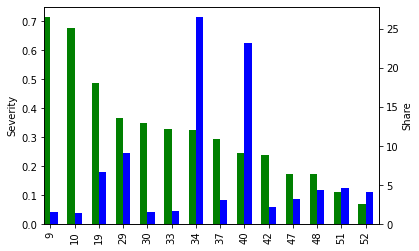

In [11]:
#create plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.3

#link to dataset
df_cause.severity.plot(kind='bar', color='green', ax=ax, width=width, position=1)
df_cause.share.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Severity')
ax2.set_ylabel('Share')

plt.show()

In [8]:
#retrive average severity and share of incidents by time
Time_sev = %sql select TIME, SUM(SEVERITY)/COUNT(SEVERITY) from COLLISIONS group by TIME order by TIME asc
Time_rel = %sql select COUNT(TIME)/1000 from COLLISIONS group by TIME order by TIME asc

#create dataframe
df_time = pd.DataFrame(Time_sev, columns=['Vehicle','severity'])
df_time_rel = pd.DataFrame(Time_rel, columns=['share'])
df_time['share'] = df_time_rel
df_time = df_time.astype({"severity": float, "share": float})

print(df_time)

 * ibm_db_sa://rkx74274:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://rkx74274:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
     Vehicle  severity  share
0   00:00:00  0.367160  3.922
1   01:00:00  0.384576  1.971
2   02:00:00  0.381858  1.367
3   03:00:00  0.451372  1.203
4   04:00:00  0.436031  1.149
5   05:00:00  0.366306  1.294
6   06:00:00  0.331010  1.722
7   07:00:00  0.306672  2.638
8   08:00:00  0.261224  4.655
9   09:00:00  0.250232  5.399
10  10:00:00  0.216190  5.065
11  11:00:00  0.233976  5.133
12  12:00:00  0.243209  5.448
13  13:00:00  0.268545  5.891
14  14:00:00  0.276067  6.234
15  15:00:00  0.309255  6.742
16  16:00:00  0.297237  6.732
17  17:00:00  0.300000  6.990
18  18:00:00  0.316179  6.490
19  19:00:00  0.326124  5.271
20  20:00:00  0.374917  4.537
21  21:00:00  0.392120  3.731
22  22:00:00  0.393717  3.406
23  23:00:00  0.389295  3.008


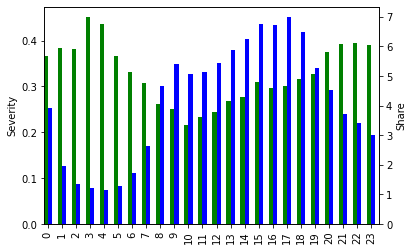

In [12]:
#create plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.3

#link to dataset
df_time.severity.plot(kind='bar', color='green', ax=ax, width=width, position=1)
df_time.share.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Severity')
ax2.set_ylabel('Share')

plt.show()

In [15]:
#retrive average severity and share of incidents by borough
Bur_sev = %sql select BOROUGH, SUM(SEVERITY)/COUNT(SEVERITY) from COLLISIONS group by BOROUGH order by BOROUGH asc
Bur_rel = %sql select COUNT(BOROUGH)/542.4 from COLLISIONS group by BOROUGH order by BOROUGH asc

#create dataframe
df_bur = pd.DataFrame(Bur_sev, columns=['Vehicle','severity'])
df_bur_rel = pd.DataFrame(Bur_rel, columns=['share'])
df_bur['share'] = df_bur_rel
df_bur = df_bur.astype({"severity": float, "share": float})
df_bur = df_bur.iloc[:-1]

print(df_bur)

 * ibm_db_sa://rkx74274:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://rkx74274:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
         Vehicle  severity      share
0          BRONX  0.298664  19.463495
1       BROOKLYN  0.312491  38.950958
2      MANHATTAN  0.206703  23.377581
3         QUEENS  0.289013  34.887536
4  STATEN ISLAND  0.461589   2.783923


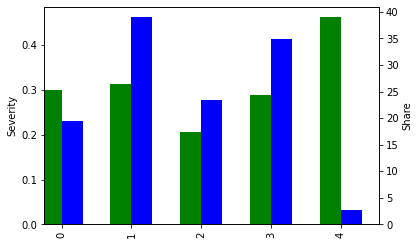

In [16]:
#create plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.3

#link to dataset
df_bur.severity.plot(kind='bar', color='green', ax=ax, width=width, position=1)
df_bur.share.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Severity')
ax2.set_ylabel('Share')

plt.show()